<h1>Polynomial Logistic Regression</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

# Generate a non-linear dataset with 500 samples
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Create a DataFrame with two input columns and one output column
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Target"] = y

# Display the first few rows of the dataset
print(df.head())

# Optionally, save the dataset to a CSV file
df.to_csv("data.csv", index=False)


   Feature1  Feature2  Target
0  0.830858 -0.334342       1
1  0.991710  0.879000       0
2  1.107245 -0.470344       1
3 -0.140899  1.033148       0
4  0.405592  1.328529       0


In [3]:
df.head()

,Feature1,Feature2,Target
0,0.830858,-0.334342,1
1,0.991710,0.879000,0
2,1.107245,-0.470344,1
3,-0.140899,1.033148,0
4,0.405592,1.328529,0


In [5]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

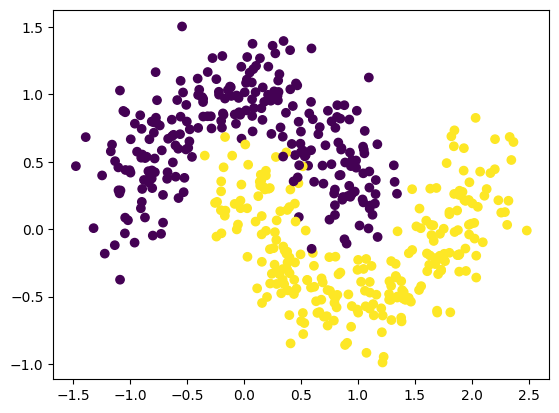

In [6]:
plt.scatter(X[:,0] , X[:,1] , c=Y)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [9]:
clf.fit(X , Y)

LogisticRegression()

<Axes: >

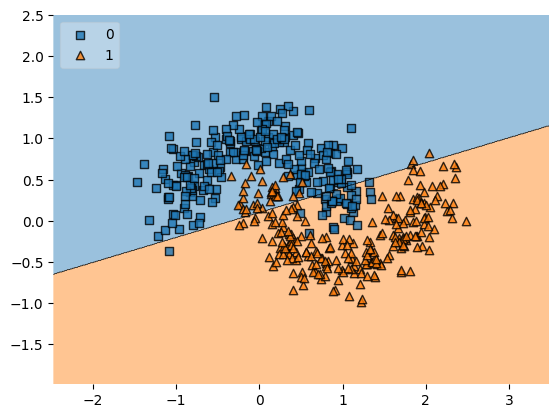

In [10]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X , Y.astype('int') , clf , legend=2 )

In [11]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf , X , Y , scoring='accuracy' , cv=10))

np.float64(0.8560000000000001)

In [12]:
from sklearn.preprocessing import PolynomialFeatures


In [13]:
poly = PolynomialFeatures(degree=3 , include_bias=False)
X_trf = poly.fit_transform(X)

In [14]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1 , X_trf , Y , scoring='accuracy' , cv=10))

np.float64(0.96)

In [15]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

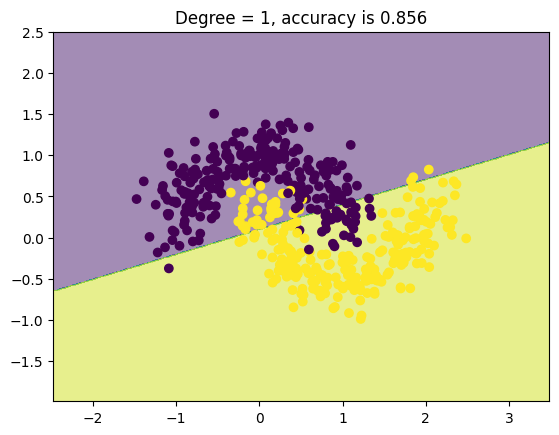

In [16]:
plot_decision_boundary(X,Y)

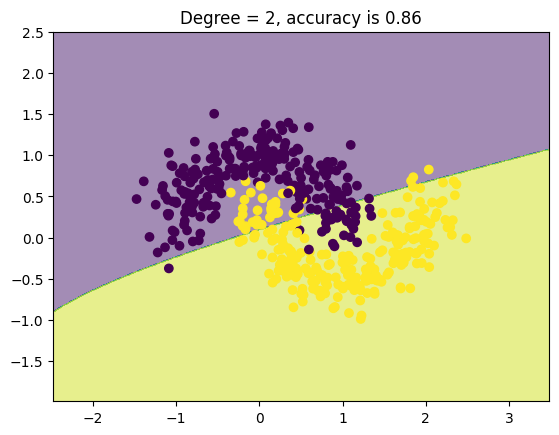

In [17]:
plot_decision_boundary(X,Y,degree=2)

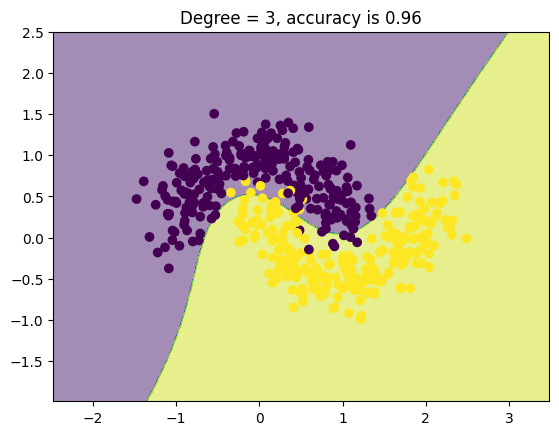

In [18]:
plot_decision_boundary(X,Y,degree=3)

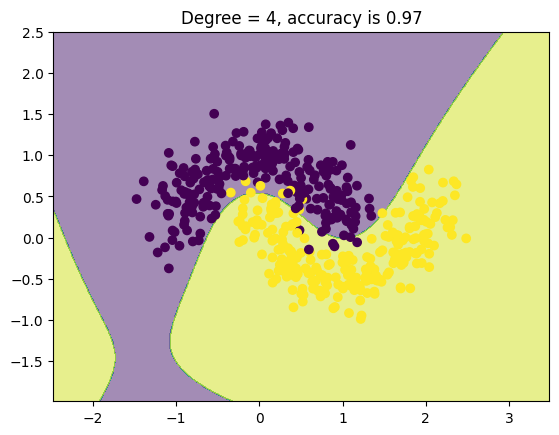

In [19]:
plot_decision_boundary(X,Y,degree=4)

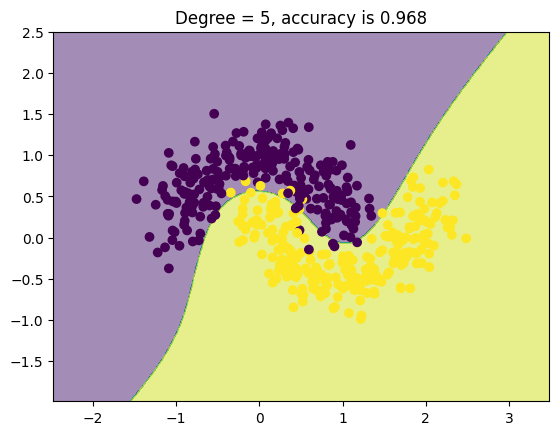

In [20]:
plot_decision_boundary(X,Y,degree=5)

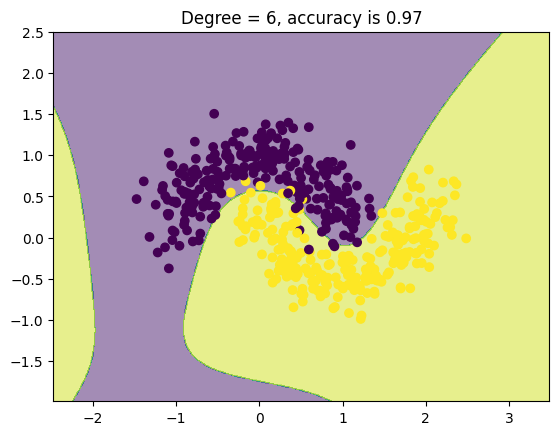

In [21]:
plot_decision_boundary(X,Y,degree=6)